In [76]:
import sys
if ".." not in sys.path: sys.path.append("..")
import time
import numpy as np
import scipy.integrate as si
import matplotlib.pyplot as plt
from common import util, constraints, constants, cosmology
import model

In [101]:
def sim(H_inf, theta_i, g, chi0, Gamma_phi, end=1e-4, converge=True):
    f_a_min = constraints.calc_f_a_min(H_inf)
    m_a = constraints.minimal_axion_mass_from_decay(f_a_min)
    m_chi = 1e-2
    start = time.time()
    sol = model.simulate(m_a=m_a, f_a=f_a_min, Gamma_phi=Gamma_phi, H_inf=H_inf, chi0=chi0, m_chi=m_chi,
                        theta0=theta_i, end=end, converge=converge)
    end = time.time()
    if end - start > 60:
        print("took:", (end - start) / 60, "minutes")
    else:
        print("took:", end - start, "seconds")
    plt.loglog(sol.t, np.abs(cosmology.n_L_to_eta_B_final(sol.T, sol.n_L)))
    plt.xlabel("t")
    plt.ylabel("|eta_B|")
    plt.show()
    plt.semilogx(sol.t, sol.theta * f_a_min, label="axion")
    plt.xlabel("t")
    plt.ylabel("axion")
    plt.show()
    plt.semilogx(sol.t, sol.chi, label="chion")
    plt.xlabel("t")
    plt.ylabel("chion")
    plt.show()
    
    return sol

In [70]:
def make_plot(filename, show_runtime=False):
    data = util.load_data(filename)
    if len(data) == 2:
        inputs, outputs = data
        H_inf = 1e9
        has_time = False
    else:
        H_inf, inputs, outputs_ = data
        outputs, times = zip(*outputs_)
        time_dict = dict(zip(inputs, times))
        has_time = True
    f_a_min = constraints.calc_f_a_min(H_inf)
    m_a = constraints.minimal_axion_mass_from_decay(f_a_min)
    m_chi = 1e-2
    print(f"m_chi = {m_chi:e}, H_inf = {H_inf:e}, f_a = {f_a_min:e} GeV, m_a = {m_a:e} GeV")
    a0_vals, g_vals, chi0_vals, Gamma_phi_vals = [np.array(sorted(list(set(x[i] for x in inputs)))) 
                                                  for i in range(4)]
    theta_i_vals = a0_vals / f_a_min
    data_dict = dict(zip(inputs, outputs))
    
    for Gamma_phi in Gamma_phi_vals:
        plt.figure(figsize=(15,5))
        for i, g in enumerate(g_vals):
            plt.subplot(1, len(g_vals), i + 1)
            data = np.array([[data_dict[a0, g, chi0, Gamma_phi] for a0 in a0_vals] for chi0 in chi0_vals])
            try:
                goal = np.log10(constants.eta_B_observed)
                c = plt.contour(theta_i_vals, chi0_vals, np.log10(np.abs(data)), levels=[goal])
                c.collections[np.where(c.levels == goal)[0][0]].set_color("red")
            except IndexError:
                pass
            plt.contourf(theta_i_vals, chi0_vals, np.log10(np.abs(data)))
            plt.xlim(plt.xlim()[0], 1)
            plt.xscale("log")
            plt.yscale("log")
            plt.xlabel("theta_i")
            plt.ylabel("chi0 / GeV")
            plt.title(f"g = {g:.2e}, Gamma_phi = {Gamma_phi:.2e} GeV")
            plt.colorbar().set_label("log_10 eta_B proj")
                    
        plt.tight_layout()
        plt.show()
        
        # runtime
        if show_runtime and has_time:
            plt.figure(figsize=(15,5))
            for i, g in enumerate(g_vals):
                plt.subplot(1, len(g_vals), i + 1)
                data = np.array([[time_dict[a0, g, chi0, Gamma_phi] for a0 in a0_vals] for chi0 in chi0_vals])
                plt.contourf(theta_i_vals, chi0_vals, data)
                plt.xscale("log")
                plt.yscale("log")
                plt.xlabel("theta_i")
                plt.ylabel("chi0 / GeV")
                plt.colorbar().set_label(f"runtime in % of 2 minutes (the timeout)")

            plt.tight_layout()
            plt.show()

m_chi = 1.000000e-02, H_inf = 1.000000e+09, f_a = 1.666667e+12 GeV, m_a = 1.124577e+03 GeV


<ipython-input-67-e1b9a63fef18>:28: UserWarning: No contour levels were found within the data range.
  c = plt.contour(theta_i_vals, chi0_vals, np.log10(np.abs(data)), levels=[goal])


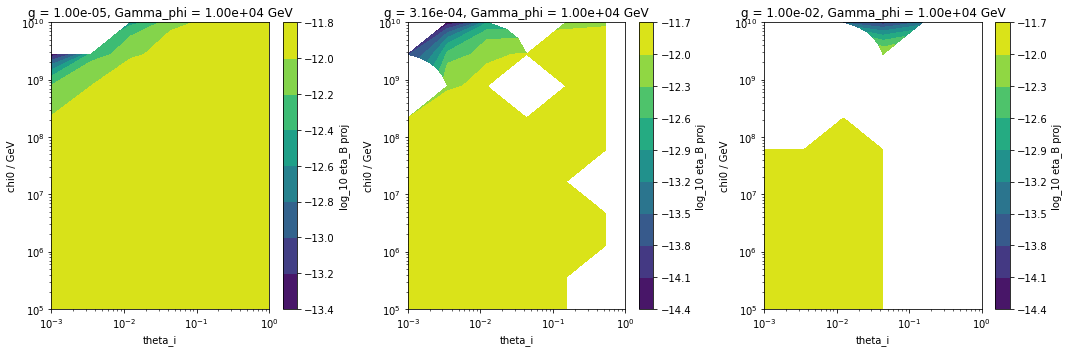

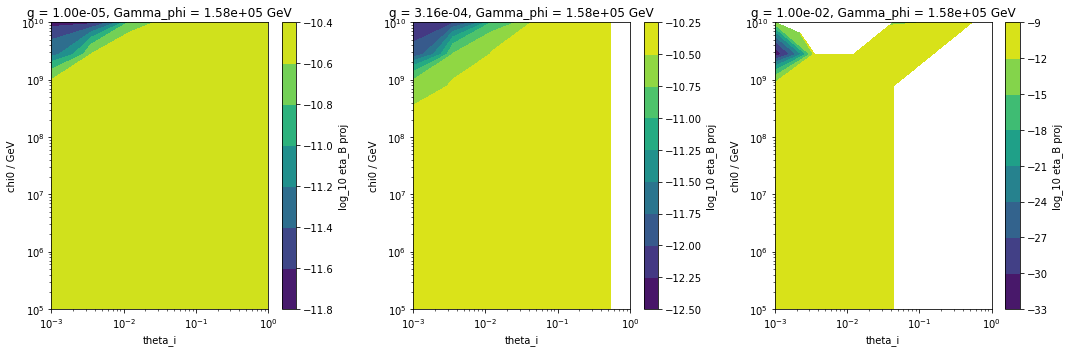

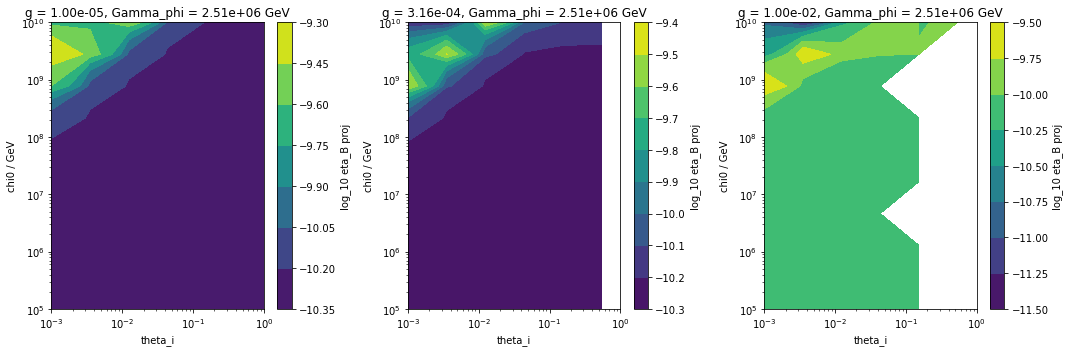

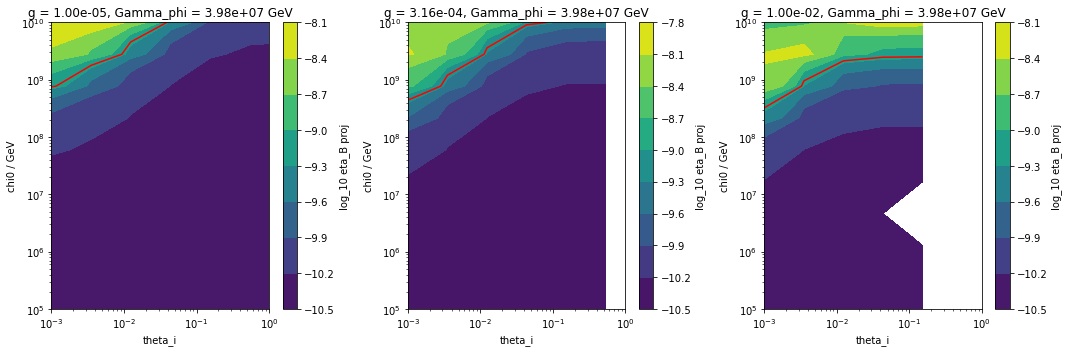

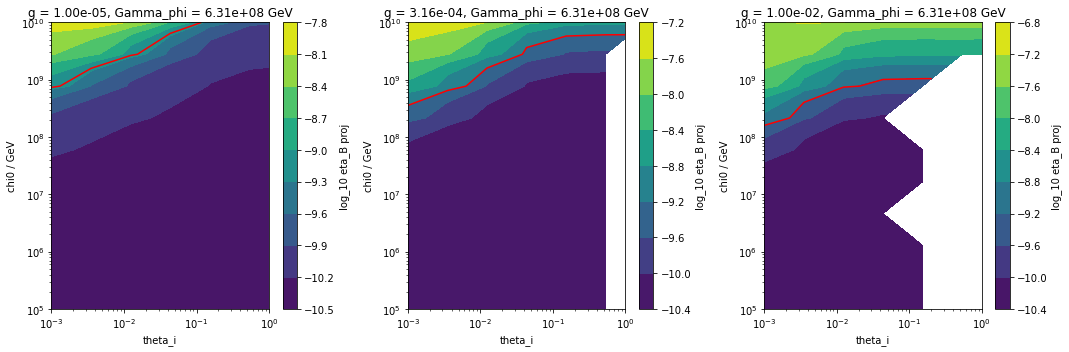

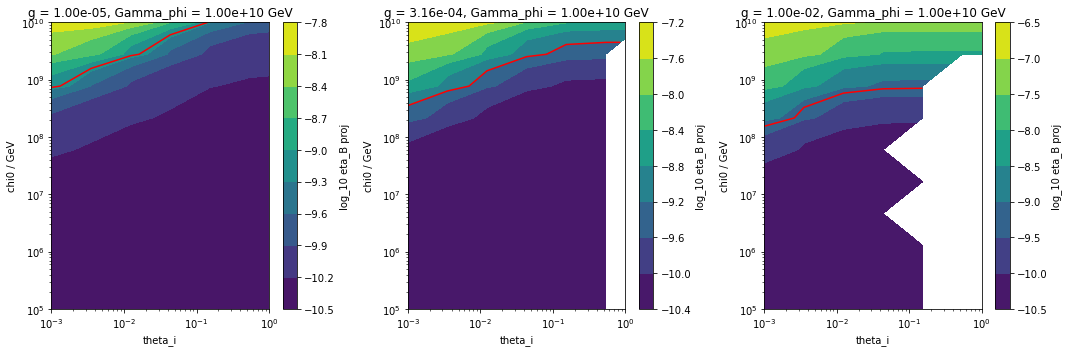

In [68]:
make_plot("scan_1.pkl")

m_chi = 1.000000e-02, H_inf = 1.000000e+09, f_a = 1.666667e+12 GeV, m_a = 1.124577e+03 GeV


<ipython-input-54-a2a0e4d9a8ff>:24: UserWarning: No contour levels were found within the data range.
  c = plt.contour(theta_i_vals, chi0_vals, np.log10(np.abs(data)), levels=[goal])


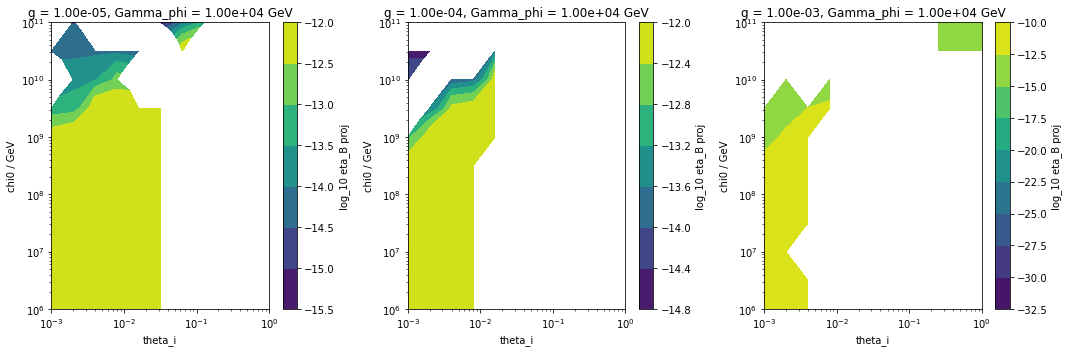

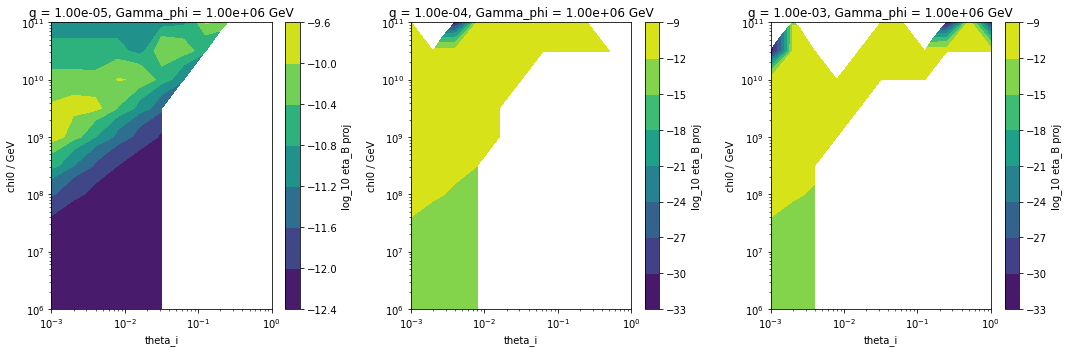

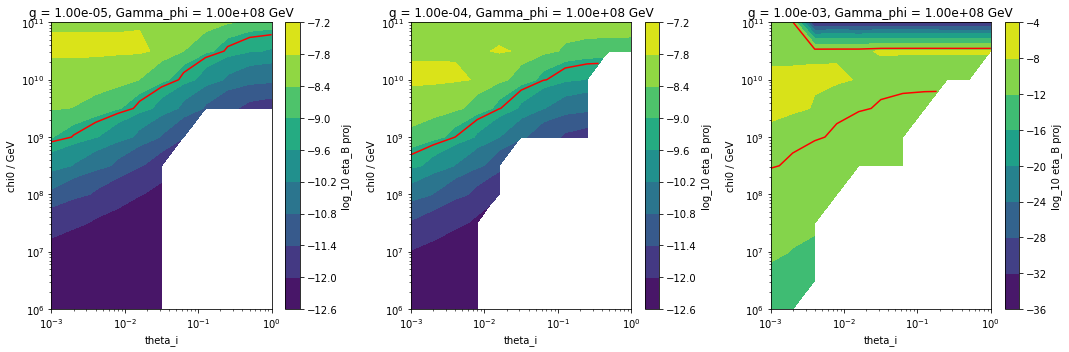

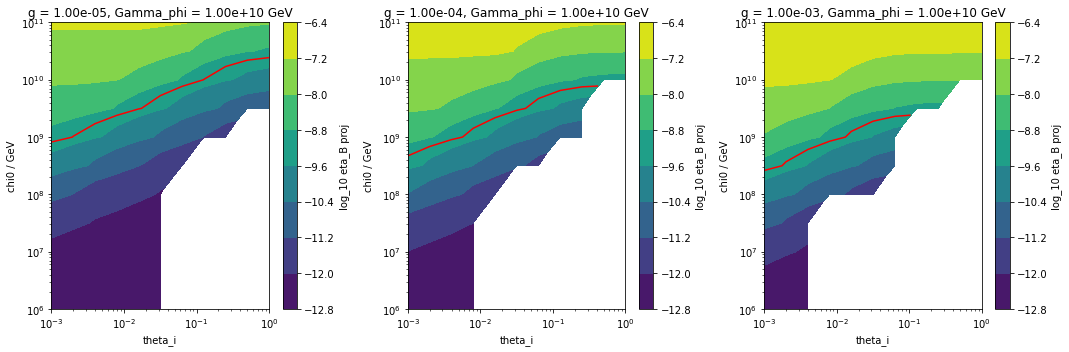

In [56]:
make_plot("scan_2.pkl")

m_chi = 1.000000e-02, H_inf = 1.000000e+07, f_a = 1.666667e+10 GeV, m_a = 5.219824e+01 GeV


<ipython-input-70-42bc31b7ec25>:28: UserWarning: No contour levels were found within the data range.
  c = plt.contour(theta_i_vals, chi0_vals, np.log10(np.abs(data)), levels=[goal])


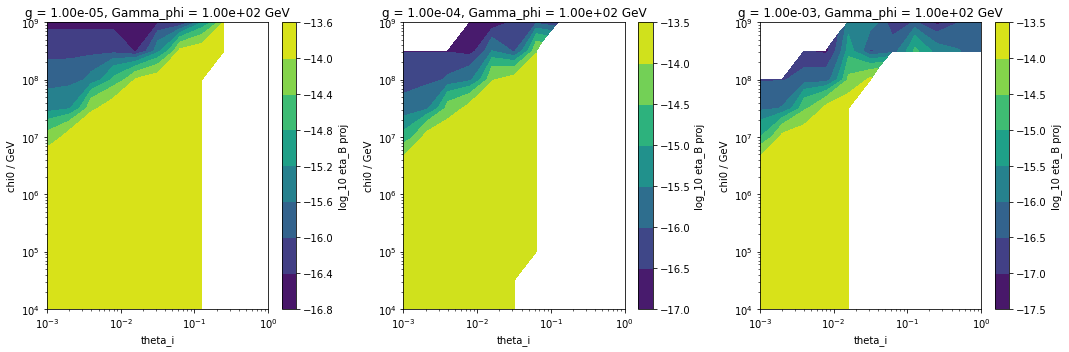

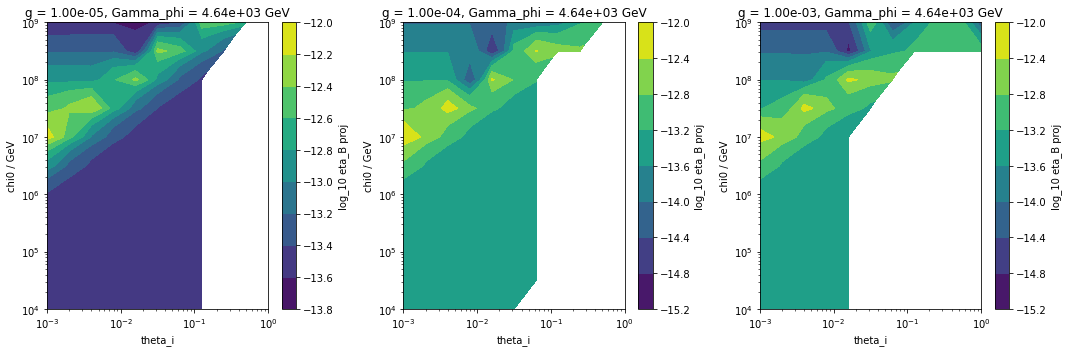

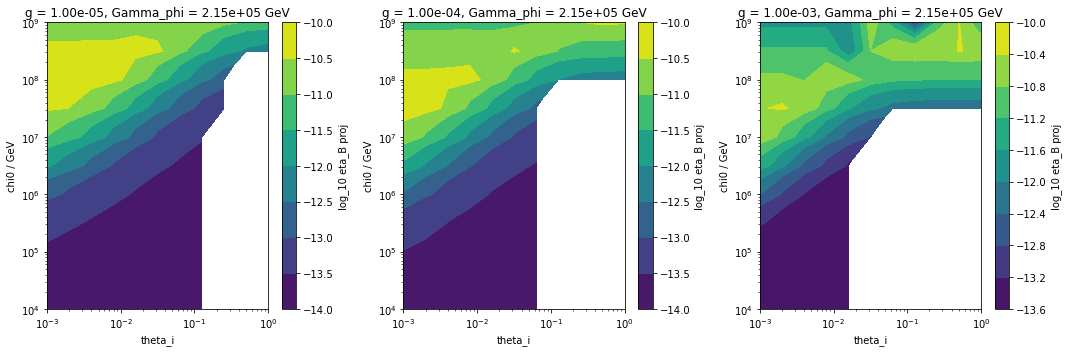

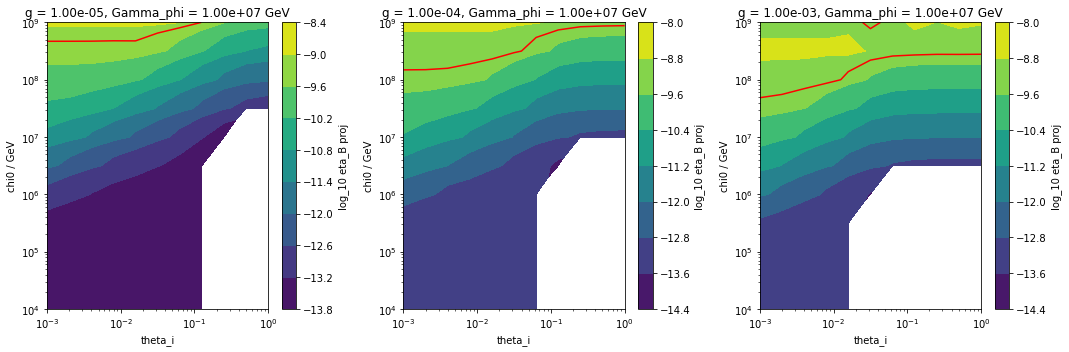

In [71]:
make_plot("scan_1e7.pkl")

took: 20.779290676116943 seconds


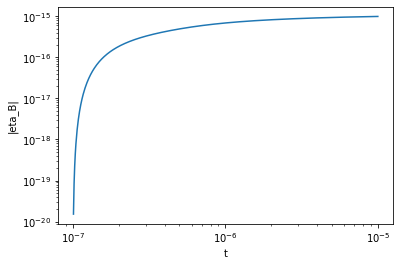

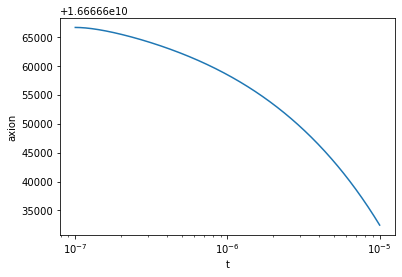

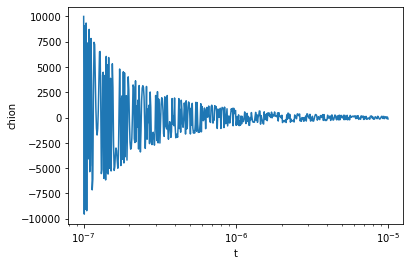

In [88]:
sim(H_inf=1e7, theta_i=1, g=1e-5, chi0=1e4, Gamma_phi=1e7, converge=False, end=1e-5)

m_chi = 1.000000e-02, H_inf = 1.000000e+08, f_a = 1.666667e+11 GeV, m_a = 2.422827e+02 GeV


<ipython-input-54-a2a0e4d9a8ff>:24: UserWarning: No contour levels were found within the data range.
  c = plt.contour(theta_i_vals, chi0_vals, np.log10(np.abs(data)), levels=[goal])


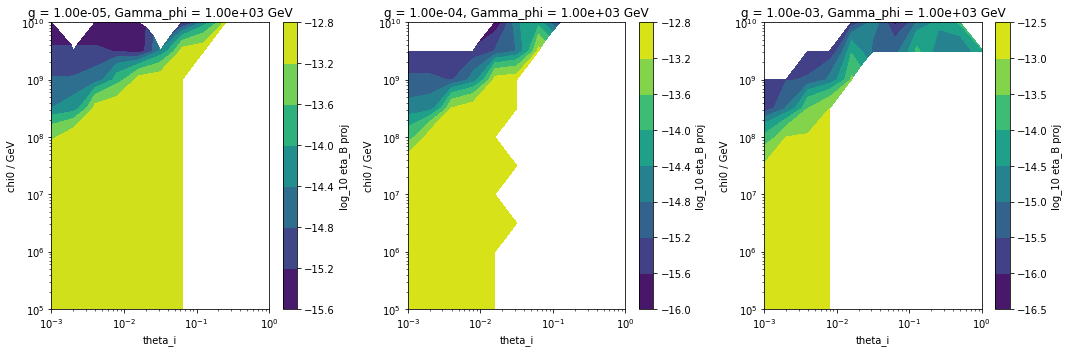

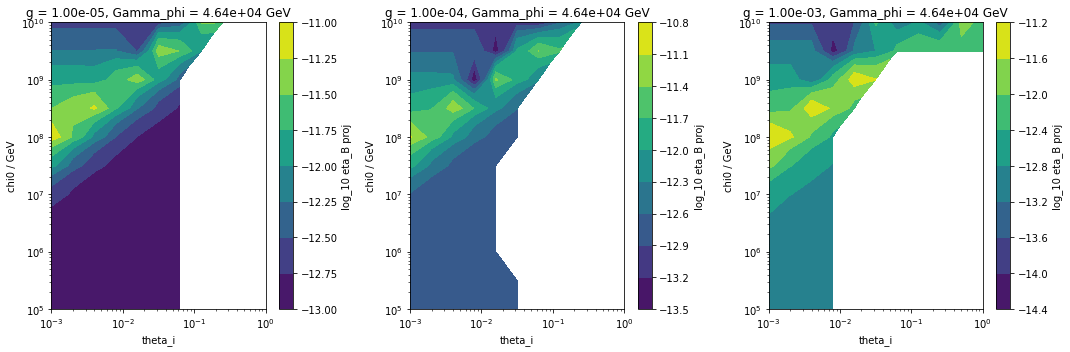

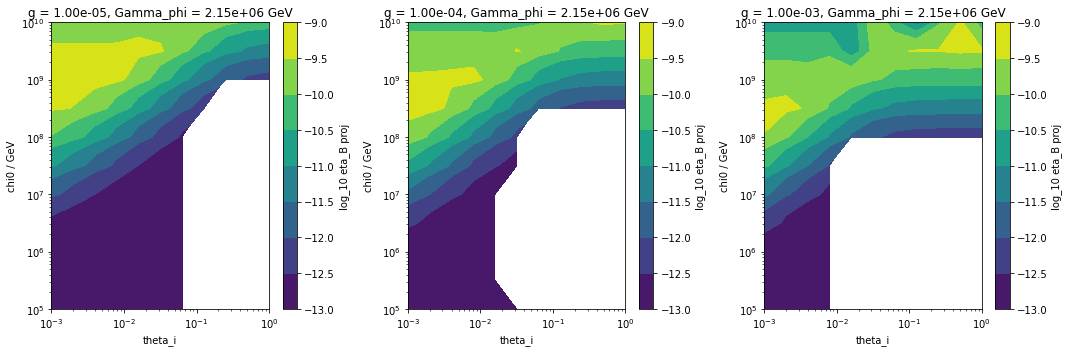

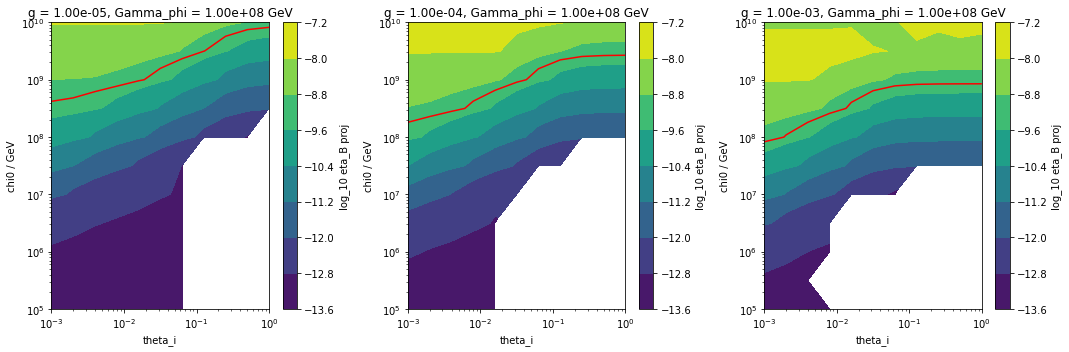

In [58]:
make_plot("scan_1e8.pkl")

m_chi = 1.000000e-02, H_inf = 1.000000e+12, f_a = 1.666667e+15 GeV, m_a = 1.124577e+05 GeV


<ipython-input-70-42bc31b7ec25>:28: UserWarning: No contour levels were found within the data range.
  c = plt.contour(theta_i_vals, chi0_vals, np.log10(np.abs(data)), levels=[goal])


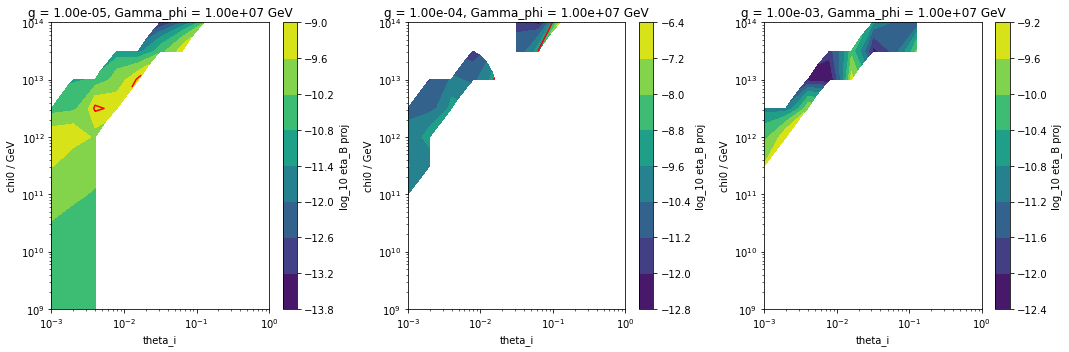

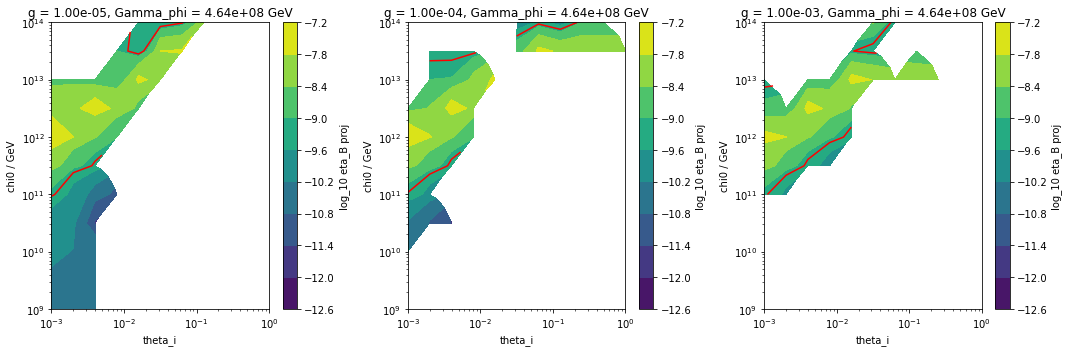

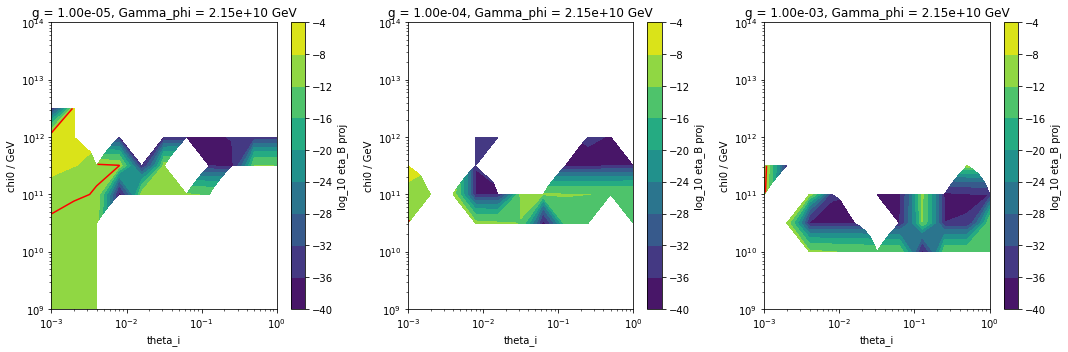

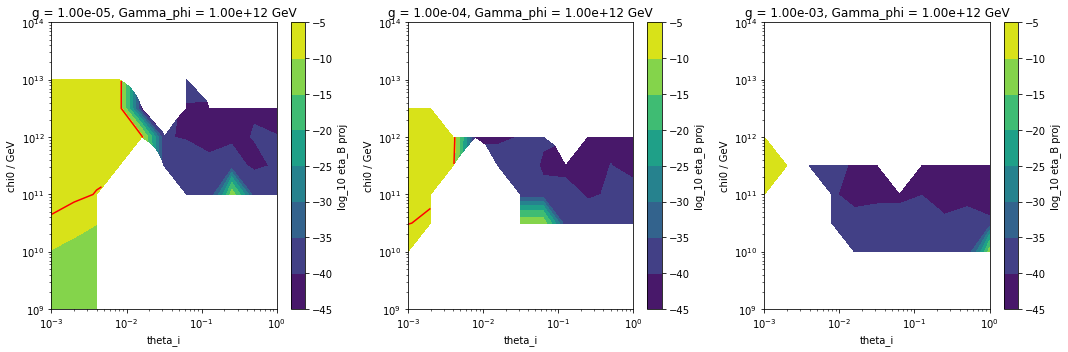

In [73]:
make_plot("scan_1e12.pkl")